In [ ]:
# libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
import time

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef

#Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

#Neural Network
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Lambda, Layer, ReLU
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D,Concatenate

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from keras import optimizers

In [ ]:
import tensorflow
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Dense, Input, Reshape, Lambda, Layer, Flatten, BatchNormalization,AveragePooling2D
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

from keras import initializers

from keras.utils import to_categorical
from keras.layers.core import Activation

In [ ]:
data_path6 = '/content/Epileptic Seizure Recognition.csv'
figures_path = './figures'

In [ ]:
if not os.path.exists(figures_path):
    os.makedirs(figures_path)
if not os.path.exists(figures_path+"/6FP"):
    os.makedirs(figures_path+"/6FP")


In [ ]:
Data = pd.read_csv(data_path6)

In [ ]:
Data=Data.drop(["Unnamed"],axis=1)

In [ ]:
Labels = Data['y'].values
Features = Data.drop(['y'],axis=1).values


print('Features shape:', Features.shape)
print('Labels shape:', Labels.shape)


Features shape: (11500, 178)
Labels shape: (11500,)


In [ ]:
for i in range(len(Labels)):
  Labels[i] = Labels[i]-1


In [ ]:
Labels

array([3, 0, 4, ..., 4, 2, 3])

In [ ]:
LabelDataFrame=pd.DataFrame(Labels)

In [ ]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        train_start_time = time.time()
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        print(f'Train runtime: {time.time()-train_start_time}')
        test_start_time = time.time()
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        print(f'Test runtime: {time.time()-test_start_time}')
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        Class_report(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CR.pdf")

#Class Prediction Error
def CPE_viz():
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CPE(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CPE.pdf")

#Confusion matrix
def CM_viz():
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CM(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CM.pdf")

#ROC-AUC
def ROC_viz():
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        ROC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_ROC.pdf")

#Precision Recall Curve
def PRC_viz():
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        PRC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_PRC.pdf")

In [ ]:
LabelDataFrame[0].value_counts()

3    2300
0    2300
4    2300
1    2300
2    2300
Name: 0, dtype: int64

In [ ]:
# Write function for aggregate metrics
def classifier_metrics():
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
       # model.save('modeloEpilepsia.h5')
        try:
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)

        acc_score=accuracy_score(y_test,y_pred)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('accuracy_score: {0:.4f}'.format(acc_score))
        print('cohen_kappa_score: {0:.4f}'.format(c_k_s))
        print('log_loss: {0:.4f}'.format(log_metric))
        print('zero_one_loss: {0:.4f}'.format(zero_met))
        print('hemming_loss: {0:.4f}'.format(hl))
        print('matthews_corrcoef: {0:.4f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("---------------------------------------------------------------------------------")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.2, stratify=Labels, random_state=42)

print('Train data shape:', X_train.shape)
print('Train labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Train data shape: (9200, 178)
Train labels shape: (9200,)
Test data shape: (2300, 178)
Test labels shape: (2300,)


In [ ]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(9200, 178)

In [ ]:
X_train=np.expand_dims(X_train, axis=-1)
X_test=np.expand_dims(X_test, axis=-1)

In [ ]:
X_train.shape

(9200, 178, 1)

In [ ]:
#classes
classes = [0, 1, 2, 3, 4]

In [ ]:
# select classifiers

## HIPERPARAMETROS
#classifiers=[
#ExtraTreesClassifier(n_estimators=220, max_depth=None, min_samples_split=3, random_state=18), #Definitivo
#svm.SVC(C=3000000, gamma=0.1), #Definitivo
#RandomForestClassifier(n_estimators=600,criterion='entropy',random_state=18), #Definitivo
#GradientBoostingClassifier(n_estimators=2048, learning_rate=0.03, max_depth=10, random_state=10) #Definitivo
#]

#names=['ET', 'SVM', 'RF','GB']

In [ ]:
#deploy visualization A
#visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [ ]:
#Deploy aggregate metrics
#classifier_metrics()

In [ ]:
from keras.layers import GlobalAveragePooling2D,ReLU
num_clases=5
vec=16
class DigitCapsuleLayer(Layer):
    # creating a layer class in keras
    def __init__(self, **kwargs):
        super(DigitCapsuleLayer, self).__init__(**kwargs)
        self.kernel_initializer = initializers.get('glorot_uniform')

    def build(self, input_shape):
        # initialize weight matrix for each capsule in lower layer
        self.W = self.add_weight(shape = [1,2,num_clases, vec, 512], initializer = self.kernel_initializer, name = 'weights')
        self.built = True

    def call(self, inputs):

        u = tf.reshape(inputs, (-1, 2, 512)) # u.shape: (None, 1152, 8)
        u = tf.expand_dims(u, axis=-2) # u.shape: (None, 1152, 1, 8)
        u = tf.expand_dims(u, axis=-1) # u.shape: (None, 1152, 1, 8, 1)
        u_hat = tf.matmul(self.W, u) # u_hat.shape: (None, 1152, 10, 16, 1)
        u_hat = tf.squeeze(u_hat, [4]) # u_hat.shape: (None, 1152, 10, 16)
        b = tf.zeros(shape = [K.shape(inputs)[0],2, num_clases, 1])

# routing algorithm with updating coupling coefficient c, using scalar product b/w input capsule and output capsule
        for i in range(3-1):
            c = tf.nn.softmax(b, axis=-2) # c.shape: (None, 1152, 10, 1)
            s = tf.reduce_sum(tf.multiply(c, u_hat), axis=1, keepdims=True) # s.shape: (None, 1, 10, 16)
            v = squash(s) # v.shape: (None, 1, 10, 16)
            agreement = tf.squeeze(tf.matmul(tf.expand_dims(u_hat, axis=-1), tf.expand_dims(v, axis=-1), transpose_a=True), [4]) # agreement.shape: (None, 1152, 10, 1)
            # Before matmul following intermediate shapes are present, they are not assigned to a variable but just for understanding the code.
            # u_hat.shape (Intermediate shape) : (None, 1152, 10, 16, 1)
            # v.shape (Intermediate shape): (None, 1, 10, 16, 1)
            # Since the first parameter of matmul is to be transposed its shape becomes:(None, 1152, 10, 1, 16)
            # Now matmul is performed in the last two dimensions, and others are broadcasted
            # Before squeezing we have an intermediate shape of (None, 1152, 10, 1, 1)
            b += agreement

        return v

    def compute_output_shape(self, input_shape):
        return tuple([None, num_clases, vec])

epsilon = 1e-7

def output_layer(inputs):
    return K.sqrt(K.sum(K.square(inputs), -1) + K.epsilon())

def squash(inputs):
    # take norm of input vectors
    squared_norm = tf.keras.backend.sum(tf.keras.backend.square(inputs), axis = -1, keepdims = True)

    # use the formula for non-linear function to return squashed output
    return ((squared_norm/(1+squared_norm))/(K.sqrt(squared_norm+K.epsilon())))*inputs

def safe_norm(v, axis=-1, epsilon=1e-7):
    v_ = tf.reduce_sum(tf.square(v), axis = axis, keepdims=True)
    return tf.sqrt(v_ + epsilon)


In [ ]:


class KerasBatchClassifier(KerasClassifier, BaseEstimator):
    def __init__(self, model, **kwargs):
        super().__init__(model)
        self.fit_kwargs = kwargs
        self._estimator_type = 'classifier'

    def fit(self, x, y, *args, **kwargs):
        y = np.array(y)
        if len(y.shape) == 2 and y.shape[1] > 1:
          self.classes_ = np.arange(y.shape[1])
        elif (len(y.shape) == 2 and y.shape[1] == 1) or len(y.shape) == 1:
          self.classes_ = np.unique(y)
          y = np.searchsorted(self.classes_, y)
        else:
          raise ValueError('Invalid shape for y: ' + str(y.shape))
        self.n_classes_ = len(self.classes_)
        return super(KerasClassifier, self).fit(x, y, **self.fit_kwargs)


# RED NEURONAL
def FullyConnected():

  inputs = Input(shape=(X_train.shape[1],1), name="input_1")


  Layer_1=tf.keras.layers.Conv1D(32,3,activation="selu",padding="same")(inputs)
  Layer_1=tf.keras.layers.Conv1D(32,3,activation="selu",padding="same")(Layer_1)
  Pool_1=tf.keras.layers.MaxPool1D(2)(Layer_1)
  Pool_1=tf.keras.layers.Dropout(rate=0.5)(Pool_1)


  Layer_1=tf.keras.layers.Conv1D(64,3,activation="selu",padding="same")(Pool_1)
  Layer_1=tf.keras.layers.Conv1D(64,3,activation="selu",padding="same")(Layer_1)
  Pool_1=tf.keras.layers.MaxPool1D(2)(Layer_1)
  Pool_1=tf.keras.layers.Dropout(rate=0.5)(Pool_1)

  Layer_1=tf.keras.layers.Conv1D(128,3,activation="selu",padding="same")(Pool_1)
  Layer_1=tf.keras.layers.Conv1D(128,3,activation="selu",padding="same")(Layer_1)
  Layer_1=tf.keras.layers.Conv1D(128,3,activation="selu",padding="same")(Layer_1)
  Pool_1=tf.keras.layers.MaxPool1D(2)(Layer_1)
  Pool_1=tf.keras.layers.Dropout(rate=0.5)(Pool_1)

  Layer_1=tf.keras.layers.Conv1D(256,3,activation="selu",padding="same")(Pool_1)
  Layer_1=tf.keras.layers.Conv1D(256,3,activation="selu",padding="same")(Layer_1)
  Layer_1=tf.keras.layers.Conv1D(256,3,activation="selu",padding="same")(Layer_1)
  Pool_1=tf.keras.layers.MaxPool1D(2)(Layer_1)
  Pool_1=tf.keras.layers.Dropout(rate=0.5)(Pool_1)

  Layer_1=tf.keras.layers.Conv1D(512,3,activation="selu",padding="same")(Pool_1)
  Layer_1=tf.keras.layers.Conv1D(512,3,activation="selu",padding="same")(Layer_1)
  Layer_1=tf.keras.layers.Conv1D(512,3,activation="selu",padding="same")(Layer_1)

  Pool_1=tf.keras.layers.MaxPool1D(2)(Layer_1)
  Pool_1=tf.keras.layers.Dropout(rate=0.5)(Pool_1)

  Layer_1=tf.keras.layers.Conv1D(512,3,activation="selu",padding="same")(Pool_1)
  Layer_1=tf.keras.layers.Conv1D(512,3,activation="selu",padding="same")(Layer_1)
  Layer_1=tf.keras.layers.Conv1D(512,3,activation="selu",padding="same")(Layer_1)
  Pool_1=tf.keras.layers.MaxPool1D(2)(Layer_1)
  # squash the reshaped output to make length of vector b/w 0 and 1
  squashed_output = tf.keras.layers.Lambda(squash)(Pool_1)
  digit_caps = DigitCapsuleLayer()(squashed_output)
  Acont= safe_norm(digit_caps)
  mast = tf.reshape(Acont, (-1,Acont.shape[2],Acont.shape[3]))
  outputs = tf.keras.layers.Lambda(output_layer)(mast)
  model = Model(inputs = inputs, outputs = outputs)
  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  #model.compile(optimizer=optimizer,loss=[loss_fn,'mse'],loss_weights = [1. ,0.0005],metrics=['accuracy'])
  return model

In [ ]:
classifiers=[KerasBatchClassifier(FullyConnected, epochs=500, batch_size=128, verbose=2)]
names = ['FNN']





KerasBatchClassifier(build_fn=<function FullyConnected at 0x7f8760f20670>)
Epoch 1/500
36/36 - 15s - loss: 1.4760 - accuracy: 0.3107 - 15s/epoch - 407ms/step
Epoch 2/500
36/36 - 1s - loss: 1.2916 - accuracy: 0.3793 - 1s/epoch - 41ms/step
Epoch 3/500
36/36 - 2s - loss: 1.2101 - accuracy: 0.4012 - 2s/epoch - 42ms/step
Epoch 4/500
36/36 - 2s - loss: 1.1498 - accuracy: 0.4503 - 2s/epoch - 42ms/step
Epoch 5/500
36/36 - 1s - loss: 1.1299 - accuracy: 0.4474 - 1s/epoch - 41ms/step
Epoch 6/500
36/36 - 1s - loss: 0.9917 - accuracy: 0.5347 - 1s/epoch - 42ms/step
Epoch 7/500
36/36 - 1s - loss: 0.8535 - accuracy: 0.6035 - 1s/epoch - 42ms/step
Epoch 8/500
36/36 - 2s - loss: 0.7439 - accuracy: 0.6536 - 2s/epoch - 42ms/step
Epoch 9/500
36/36 - 2s - loss: 0.6943 - accuracy: 0.6700 - 2s/epoch - 42ms/step
Epoch 10/500
36/36 - 2s - loss: 0.7000 - accuracy: 0.6755 - 2s/epoch - 42ms/step
Epoch 11/500
36/36 - 2s - loss: 0.6711 - accuracy: 0.6726 - 2s/epoch - 43ms/step
Epoch 12/500
36/36 - 2s - loss: 0.6805 -

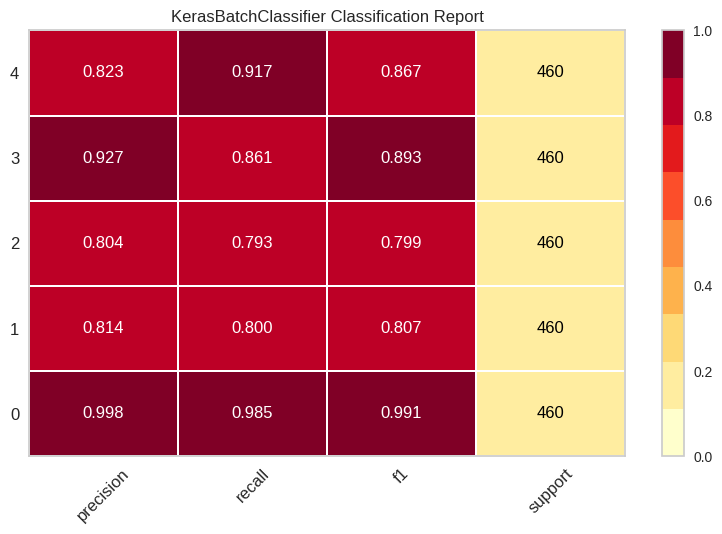

72/72 [==============================] - 0s 6ms/step - loss: 0.6248 - accuracy: 0.8713


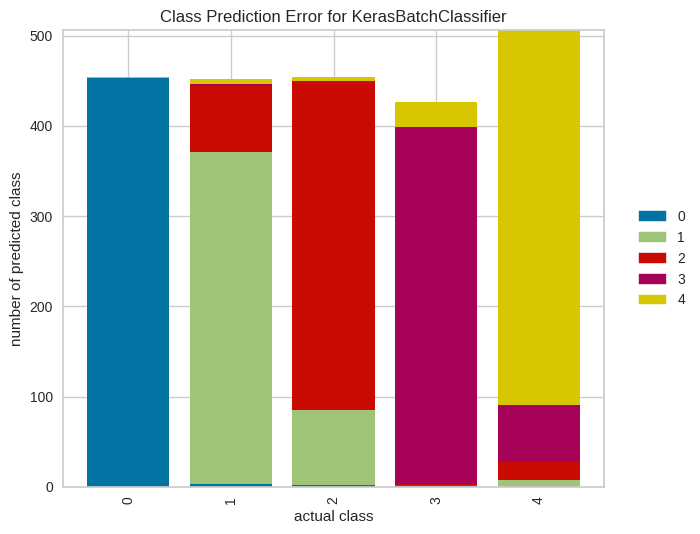

72/72 [==============================] - 0s 4ms/step


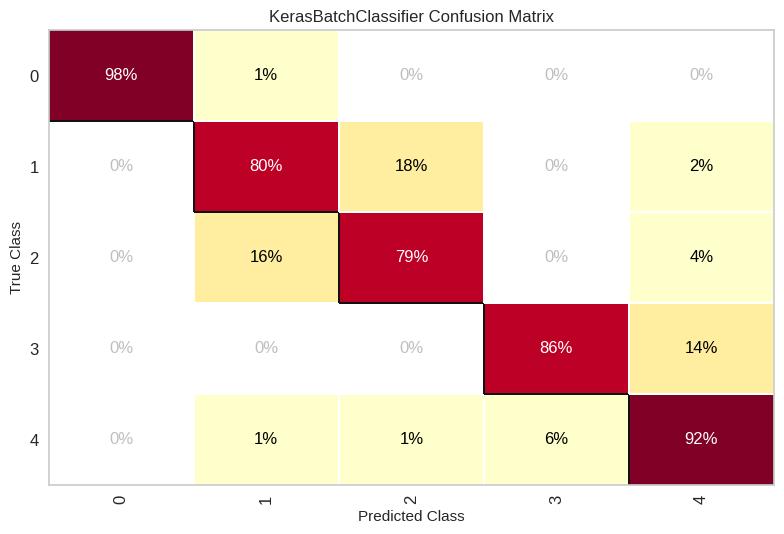

72/72 [==============================] - 0s 4ms/step


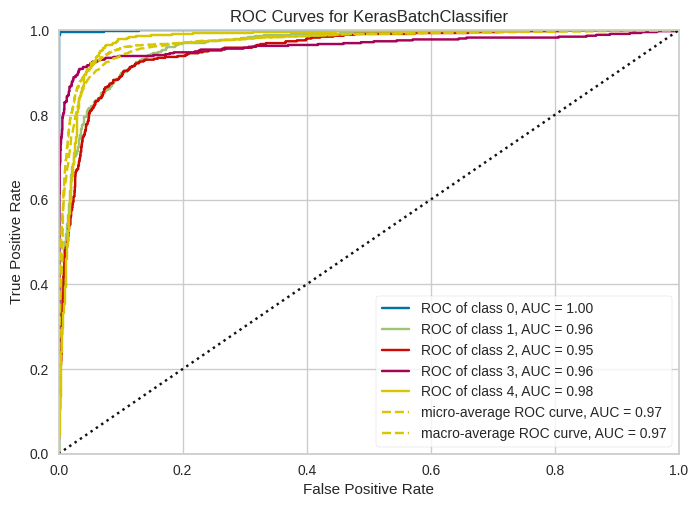

In [ ]:
classifier_metrics()
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz()]